<a href="https://colab.research.google.com/github/SJhawar1010/LLM/blob/main/Satyam_554_LLM_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: fsspec
    Fou

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
import tensorflow as tf

In [3]:
from datasets import load_dataset
dataset = load_dataset("FinanceInc/auditor_sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3877 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/969 [00:00<?, ? examples/s]

In [4]:
dataset['train']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 3877
})

In [5]:
dataset['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 969
})

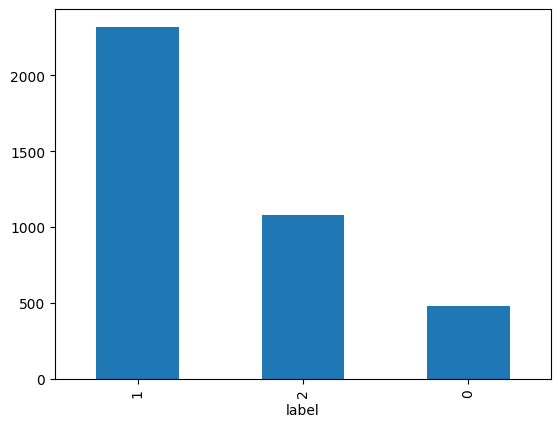

In [6]:
label_list = list(dataset['train']['label'])
df = pd.DataFrame(label_list, columns=['label'])
rst = df['label'].value_counts().plot(kind='bar')

In [7]:
positive_dataset = dataset['train'].filter(lambda row: row['label'] == 2)
negative_dataset = dataset['train'].filter(lambda row: row['label'] == 0)

Filter:   0%|          | 0/3877 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3877 [00:00<?, ? examples/s]

In [8]:
positive_dataset[0:5]

{'sentence': ["Altia 's operating profit jumped to EUR 47 million from EUR 6.6 million .",
  'The agreement was signed with Biohit Healthcare Ltd , the UK-based subsidiary of Biohit Oyj , a Finnish public company which develops , manufactures and markets liquid handling products and diagnostic test systems .',
  'Kesko pursues a strategy of healthy , focused growth concentrating on sales and services to consumer-customers .',
  "Elcoteq 's stock of orders has stabilised in the past weeks , Mr Krippl said .",
  'UPM-Kymmene has generated seventeen consecutive quarters of positive Cash Flow from Operations .'],
 'label': [2, 2, 2, 2, 2]}

In [9]:
negative_dataset[0:5]

{'sentence': ['Operating loss totalled EUR 0.9 mn , down from a profit of EUR 2.7 mn .',
  'Several large stocks tacked lower , however .',
  'As a result some 20 persons will no longer be needed .',
  'In addition the production personnel of the Sport Division have been given a temporary lay-off warning .',
  'Konecranes has previously communicated an estimated reduction of about 1,600 employees on group level in 2009 .'],
 'label': [0, 0, 0, 0, 0]}

In [10]:
seq_len = 512
batch_size = 12

num_samples = len(dataset['train'])
print('Training array of size ({} x {})'.format(num_samples, seq_len))

Training array of size (3877 x 512)


In [11]:
check_point = 'bert-base-uncased'
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(check_point)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [12]:
tokens = tokenizer(dataset['train']['sentence'], max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='pt')

In [13]:
tokens['input_ids']

tensor([[  101, 12456,  2401,  ...,     0,     0,     0],
        [  101,  1996,  3820,  ...,     0,     0,     0],
        [  101, 17710, 21590,  ...,     0,     0,     0],
        ...,
        [  101,  1996,  3189,  ...,     0,     0,     0],
        [  101, 24797,  1011,  ...,     0,     0,     0],
        [  101,  1996,  2974,  ...,     0,     0,     0]])

In [14]:
tokens['attention_mask']

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [15]:
arr = pd.DataFrame(dataset['train']['label'], columns=['label'])
arr_values = arr['label'].sort_values().unique().tolist()
print('No. of distinct label values : {}'.format(arr_values))

No. of distinct label values : [0, 1, 2]


In [16]:
labels = np.zeros((num_samples, len(arr_values)))
print('Size of the target label : {}'.format(labels.shape))

Size of the target label : (3877, 3)


In [17]:
labels[np.arange(num_samples), arr['label'].tolist()] = 1
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [18]:
ds = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], labels))
ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [19]:
def map_func(input_ids, masks, labels):

    return {'input_ids': input_ids, 'attention_mask': masks}, labels

ds = ds.map(map_func)
print(len(dataset))
ds = ds.shuffle(10000).batch(batch_size, drop_remainder=True)
print(len(dataset))
ds.take(1)

2
2


<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(12, 3), dtype=tf.float64, name=None))>

In [20]:
split = 0.8
size = int((tokens['input_ids'].shape[0] / batch_size) * split)
print('Size of the train dataset : {}, size of the validation dataset :{}'.format(size, int(tokens['input_ids'].shape[0] / batch_size - size)))

Size of the train dataset : 258, size of the validation dataset :65


In [21]:
train_ds = ds.take(size)
val_ds = ds.skip(size)
del ds

In [22]:
train_ds

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(12, 3), dtype=tf.float64, name=None))>

In [23]:
val_ds

<_SkipDataset element_spec=({'input_ids': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(12, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(12, 3), dtype=tf.float64, name=None))>

In [24]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained(check_point)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [25]:
model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 109482240 (417.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')

embeddings = model.bert(input_ids, attention_mask=mask)[1]
layer_1 = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
layer_2 = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(layer_1)

In [27]:
sentiment_model = tf.keras.Model(inputs=[input_ids, mask], outputs=layer_2)
sentiment_model.layers[2].trainable = True

In [28]:
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                       

In [29]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

sentiment_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [30]:
history = sentiment_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
258/258 [==============================] - 2509s 10s/step - loss: 0.6258 - accuracy: 0.7242 - val_loss: 0.3577 - val_accuracy: 0.8615
Epoch 2/3
258/258 [==============================] - 2460s 10s/step - loss: 0.3437 - accuracy: 0.8643 - val_loss: 0.2225 - val_accuracy: 0.9218
Epoch 3/3
258/258 [==============================] - 2450s 9s/step - loss: 0.2313 - accuracy: 0.9134 - val_loss: 0.1570 - val_accuracy: 0.9487


In [31]:
del train_ds
del val_ds

In [32]:
def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [33]:
def prep_arry_data(text_array):
    tokens = tokenizer.batch_encode_plus(text_array, max_length=512,
                                         truncation=True, padding='max_length',
                                         add_special_tokens=True, return_token_type_ids=False,
                                         return_tensors='tf')
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [34]:
label_mapping = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

In [35]:
text_array = [
"XXX's strong financial performance exceeded expectations, driven by robust sales growth and effective cost management.",
"XXX demonstrated resilience in challenging economic conditions, maintaining profitability through efficient expense management.",
"XXX's net income declined due to increased operating costs and lower sales volumes. Cost-cutting measures are being implemented.",
"XXX maintains a strong liquidity position with healthy cash reserves, providing a solid foundation for future investments.",
"XXX's profitability has steadily increased, attributed to successful product launches and expanded market reach.",
"XXX's debt management efforts resulted in decreased debt levels and improved debt-to-equity ratio."

]

probs = sentiment_model.predict(prep_arry_data(text_array))
pred = np.argmax(probs, axis=1)
for count, prediction in enumerate(pred):
    print('The sentiment for test case {} is {}.'.format(count, label_mapping.get(prediction)))

1/1 [==============================] - 10s 10s/step
The sentiment for test case 0 is Positive.
The sentiment for test case 1 is Positive.
The sentiment for test case 2 is Negative.
The sentiment for test case 3 is Positive.
The sentiment for test case 4 is Positive.
The sentiment for test case 5 is Negative.


In [36]:
probs = sentiment_model.predict(prep_arry_data(dataset['test']['sentence']))
pred = np.argmax(probs, axis=1)

31/31 [==============================] - 272s 9s/step


In [ ]:
df_test = pd.DataFrame(dataset['test']['label'], columns = ['label'])
df_pred = pd.DataFrame(pred, columns = ['label'])

In [ ]:
accuracy = accuracy_score(df_pred, df_test) * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

In [ ]:
df_pred.head(5)

In [ ]:
pred_counts = pd.Series(pred).value_counts()
sorted_counts = pred_counts.sort_index()
sorted_counts.plot(kind='bar')
x_labels = ['Negative', 'Neutral', 'Positive']
plt.gca().set_xticklabels(x_labels)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Test Dataset')
plt.show()


In [ ]:
positive_pred = df_pred[df_pred['label'] == 2][0:5]
for idx in range(5):
    print('The sentiment is \033[1mPositive\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][positive_pred.index[idx]]))
    print('')

In [ ]:
negative_pred = df_pred[df_pred['label'] == 0][0:5]
for idx in range(5):
    print('The sentiment is \033[1mNegative\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][negative_pred.index[idx]]))
    print('')

In [43]:
neutral_pred = df_pred[df_pred['label'] == 1][0:5]
for idx in range(5):
    print('The sentiment is \033[1mNeutral\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][negative_pred.index[idx]]))
    print('')

The sentiment is Neutral for sentence of "Compared with the FTSE 100 index , which rose 51.5 points ( or 0.9 % ) on the day , this was a relative price change of -0.6 % .".

The sentiment is Neutral for sentence of "Calls to the switchboard and directory services have decreased significantly since our employees now have up-to-date contact information from all their colleagues and customers on their phone and can place the call directly .".

The sentiment is Neutral for sentence of "One of the challenges in the oil production in the North Sea is scale formation that can plug pipelines and halt production .".

The sentiment is Neutral for sentence of "In contrast , the company 's net loss for the third quarter of 2009 contracted to EUR 76 million from EUR 256 million for the corresponding period a year ago .".

The sentiment is Neutral for sentence of "Profit before taxes amounted to EUR 56.5 mn , down from EUR 232.9 mn a year ago .".



In [44]:
ner_name = 'test'

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
checkpoint_2 = "dslim/bert-base-NER"
ner_tokenizer = AutoTokenizer.from_pretrained(checkpoint_2)
ner_model = AutoModelForTokenClassification.from_pretrained(checkpoint_2)

In [ ]:
idx = 1
nlp = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)
sentences = dataset[ner_name]['sentence']

ner_results = nlp(sentences)

In [ ]:
len(ner_results)

In [ ]:
entity_dict = {}
entities = []
current_entity = ""
for idx in range(len(ner_results)):
    for token in ner_results[idx]:
        if token['entity'] == "B-ORG":
            if token['word'][0:2] == "##":
                current_entity += token['word'][2:]
            elif current_entity != '':
                entities.append(current_entity)
                current_entity = token['word']
            else:
                current_entity = token['word']
        elif token['entity'] == "I-ORG":
            if token['word'][0:2] == "##":
                current_entity += token['word'][2:]
            else:
                current_entity += " " + token['word']
    entities.append(current_entity)
    entity_dict[idx] = entities
    entities = []
    current_entity = ""
print('No. of records in the NER results : {}'.format(len(entity_dict)))

In [ ]:
entity_2d_array = [[k, v] for k, values in entity_dict.items() for v in values]
entity_2d_array_dedup = [sublist for sublist in entity_2d_array if all(item != '' for item in sublist)]

print('No. of organizations in the original NER: {}'.format(len(entity_2d_array)))
print('No. of organizations after the de-duplication: {}'.format(len(entity_2d_array_dedup)))

In [ ]:
entity_2d_array_dedup[:10]

In [ ]:
probs = sentiment_model.predict(prep_arry_data(dataset[ner_name]['sentence']))
pred = np.argmax(probs, axis=1)
df_pred = pd.DataFrame(pred, columns = ['label'])

In [ ]:
df_pred.value_counts()

In [ ]:
merged_array = [sublist + [df_pred.iloc[sublist[0]][0]] for sublist in entity_2d_array_dedup]


In [ ]:
idx_array = [idx_array[0] for idx_array in merged_array]
len(idx_array)

In [ ]:
entity_array = [idx_array[0] for idx_array in entity_2d_array]

len(entity_array)

In [ ]:
missing_items = [item for item in entity_array if item not in idx_array]
print(missing_items[:10])

In [ ]:
entity_2d_array_missing = [item for item in entity_2d_array if item[0] in missing_items]
entity_2d_array_missing[:10]

In [ ]:
df_ner_sentiment = pd.DataFrame(merged_array, columns=['doc_id', 'org_name', 'sentiment_label'])
df_ner_sentiment

In [ ]:
def filter_by_sentiment (label, title):
    df_ner_sentiment_positive = df_ner_sentiment[df_ner_sentiment['sentiment_label'] == label]
    result = df_ner_sentiment_positive.groupby('org_name')['doc_id'].count().sort_values(ascending=False)
    title_str = 'Top 10 Companies with ' + title + ' Audit Comments based on Sentiment Analysis'
    print('='*len(title_str))
    print(title_str)
    print('='*len(title_str))
    display(result.head(10))

In [ ]:
filter_by_sentiment (2, 'Positive')


In [ ]:
filter_by_sentiment (0, 'Negative')


In [ ]:
filter_by_sentiment (1, 'Neutral')
